# Test Wind

## Load modules

In [1]:
include("../src/ModuleLEPEE.jl");
using .ModuleLEPEE;
using Distributions;
using StatsBase;
using SpecialFunctions;
using Plots;

m=3:0.1:10
tsrdata = (tsr=3.0,rmax=45,cutin=3,cutout=30,minrs=6,maxrs=16)
winddata = (mu=17.27, k=2);


# Compare analitic Weibull with sampled Weibull

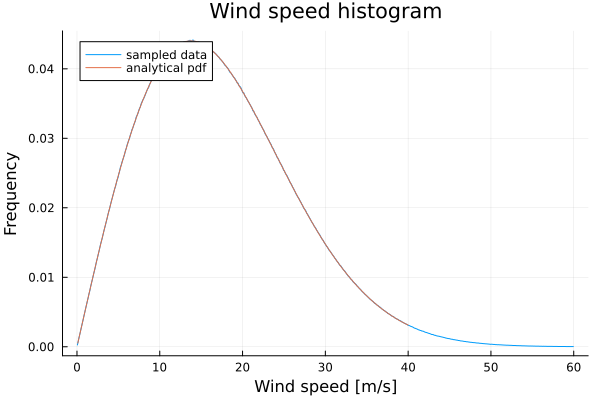

In [2]:
# Create a and sample Weibull distribution using parameter k and mu
wind_dist = Weibull(winddata.k, winddata.mu/gamma(1+1/winddata.k));
wind_data = rand(wind_dist, 100000000);

h1 = fit(Histogram, wind_data, 0:0.1:60);
wind_speed = (collect(h1.edges[1][1:end-1]) + collect(h1.edges[1][2:end])) / 2;
freq_wind = h1.weights/ ModuleLEPEE.rect(collect(h1.edges[1]),h1.weights);

wind_pdf(x) = ModuleLEPEE.pdf_weibull_wind(x,winddata)


fig_hist = plot(label = "Wind speed histogram", xlabel = "Wind speed [m/s]", ylabel = "Frequency", title = "Wind speed histogram", legend = :topleft)
plot!(fig_hist,wind_speed, freq_wind, label="sampled data")

plot!(fig_hist,collect(0.1:0.1:40), wind_pdf(collect(0.1:0.1:40)), label="analytical pdf")

display(fig_hist)


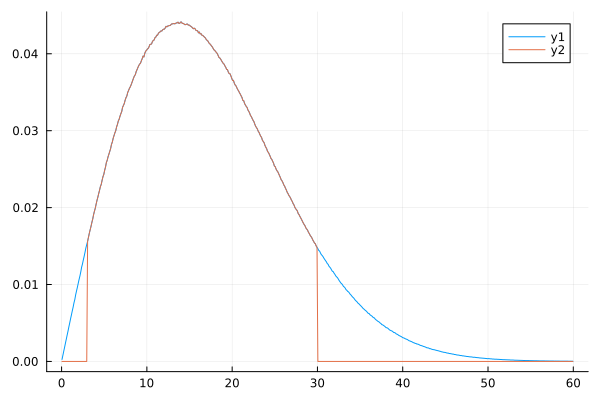

In [3]:

# Apply thresholds: set to zero values above the upper threshold (tsrdata.cutout) and below the lower threshold (tsrdata.cutin).
freq_wind_cut = copy(freq_wind);
freq_wind_cut[wind_speed .> tsrdata.cutout] .= 0;
freq_wind_cut[wind_speed .< tsrdata.cutin] .= 0;

# Create a new plot figure.
fig_wind = plot();
# Plot the original histogram data on the figure.
plot!(fig_wind, wind_speed, freq_wind);
plot!(fig_wind, wind_speed, freq_wind_cut);

# Display the combined plot with both histograms.
display(fig_wind);

## Working with angular speeds

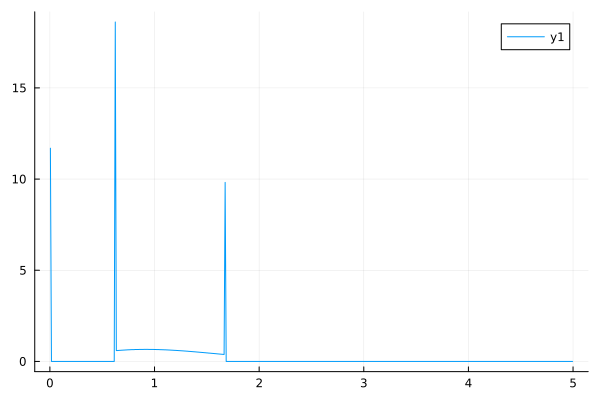

In [4]:
# Compute angular speed data by scaling wind_data with the tsr and rmax factors from tsrdata
wind_data_cut = copy(wind_data);

# Apply cutting limits to the wind data
wind_data_cut[wind_data .> tsrdata.cutout] .= 0;
wind_data_cut[wind_data .< tsrdata.cutin] .= 0;

# Apply TSR
angSpeed_data = wind_data_cut * tsrdata.tsr / tsrdata.rmax

# Apply thresholds to the angular speed data:
maxangSpeed = tsrdata.maxrs * 2 * pi / 60
minangSpeed = tsrdata.minrs * 2 * pi / 60

angSpeed_data[angSpeed_data .> maxangSpeed] .= maxangSpeed
angSpeed_data[(angSpeed_data .< minangSpeed) .& (angSpeed_data .> 0)] .= minangSpeed


h2 = fit(Histogram, angSpeed_data, 0:0.01:5);
angSpeed = (collect(h2.edges[1][1:end-1]) + collect(h2.edges[1][2:end])) / 2;
freq_angSpeed = h2.weights/ ModuleLEPEE.rect(collect(h2.edges[1]),h2.weights);


# Create a new plot for the angular speed distribution
fig_angSpeed = plot()
# Plot the histogram of the original angular speed data on the figure
plot!(fig_angSpeed, angSpeed, freq_angSpeed)

display(fig_angSpeed)

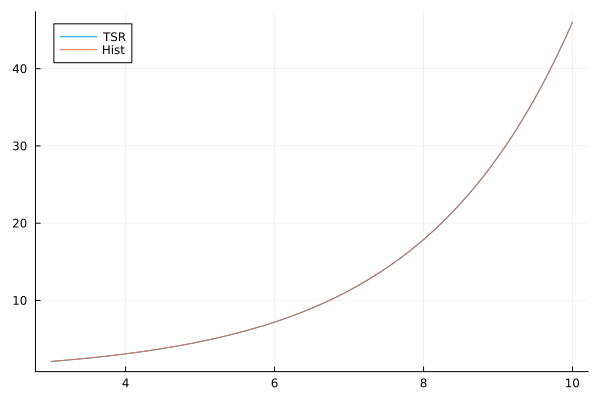

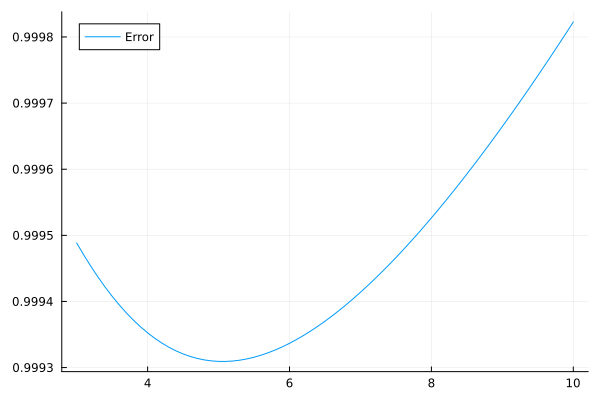

In [5]:
wtsr = Cw_TSR(m,tsrdata);
whist=Cw_Hist(m,collect(h2.edges[1]),freq_angSpeed);

fig_plot = plot();
plot!(fig_plot,m,wtsr, label="TSR");
plot!(fig_plot,m,whist, label="Hist");

display(fig_plot);


fig_error=plot();
plot!(fig_error,m,wtsr ./ whist,label="Error");
display(fig_error);